In [4]:
#Importing librairies

import pandas as pd 
import numpy as np

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools

# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

import seaborn

from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]




In [5]:
data = pd.read_csv('creditcard.csv') 
df = pd.DataFrame(data) # Converting data to Panda DataFrame

In [6]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [102]:
data.isnull().values.any()

False

In [103]:
df.describe() # Përshkrimi i veçorive statistikore

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


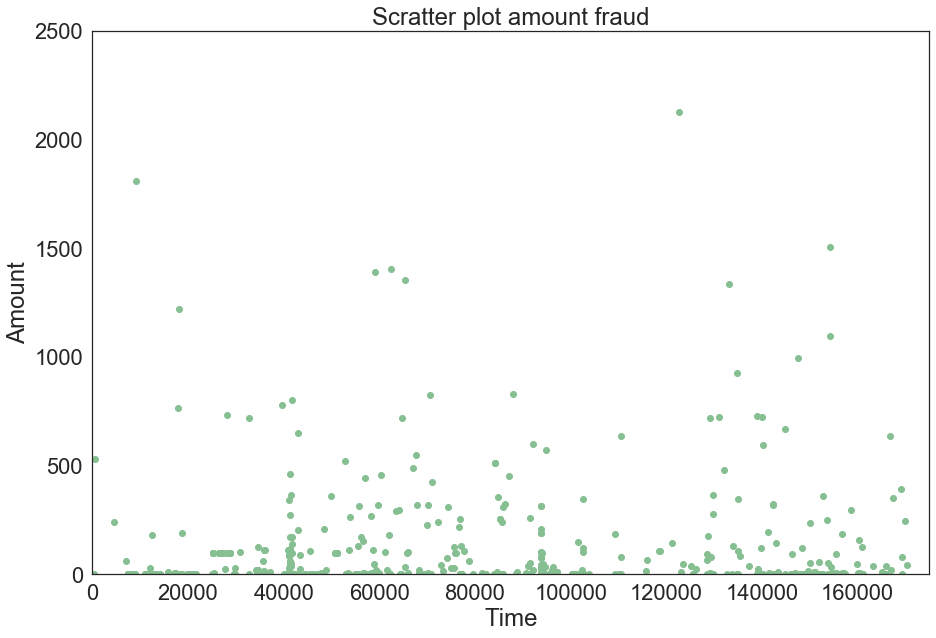

In [104]:
df_fraud = df[df['Class'] == 1] #Rikthimi i te dhenave mashtruese
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount'] ,color='#86bf91') #Shfaq shumat mashtruese duke u bazuar ne kohen e tyre
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [105]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] #Rikthimi i mashtrimeve mbi shumen 1000
print('Jane vetem '+ str(nb_big_fraud) + ' mashtrime ku shuma ishte me e madhe se 1000 nga ' + str(df_fraud.shape[0]) + ' mashtrime')

Jane vetem 9 mashtrime ku shuma ishte me e madhe se 1000 nga 492 mashtrime


In [106]:
fraud = data[data['Class']==1]

normal = data[data['Class']==0]

In [107]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('Ne dataset-in origjinal jane '+ str(number_fraud) + ' mashtrime, ndersa  ' + str(number_no_fraud) +' te verteta.')

Ne dataset-in origjinal jane 492 mashtrime, ndersa  284315 te verteta.


In [108]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [109]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [110]:

normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

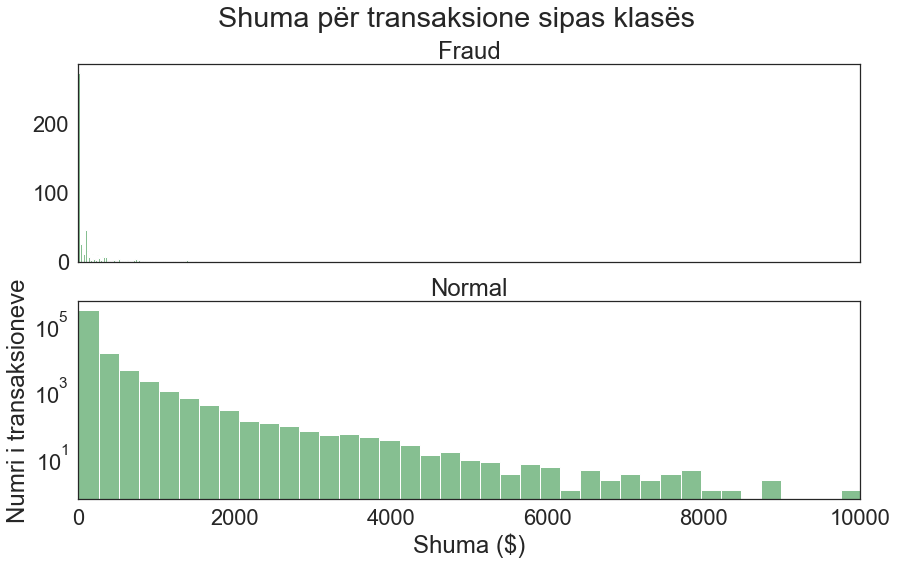

In [111]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Shuma për transaksione sipas klasës')
bins = 100
ax1.hist(fraud.Amount, bins = bins, color='#86bf91')
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins, color='#86bf91')
ax2.set_title('Normal')
plt.xlabel('Shuma ($)')
plt.ylabel('Numri i transaksioneve')
plt.xlim((0, 10000))
plt.yscale('log')
plt.show();

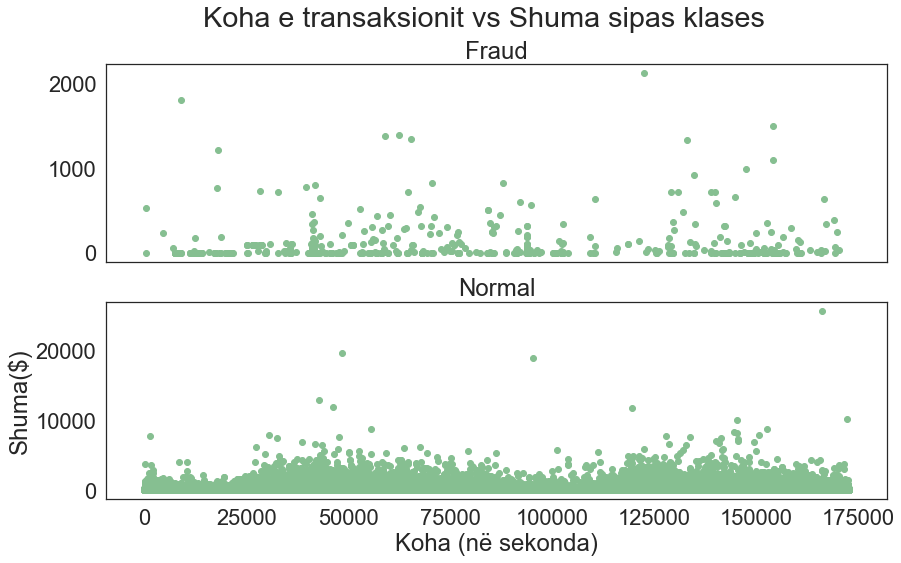

In [112]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Koha e transaksionit vs Shuma sipas klases')
ax1.scatter(fraud.Time, fraud.Amount,color='#86bf91')
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount,color='#86bf91')
ax2.set_title('Normal')
plt.xlabel('Koha (në sekonda)')
plt.ylabel('Shuma($)')
plt.show()

In [113]:
print("Atehere saktesia e klasifikimit do te ishte : "+ str((284315-492)/284315)+ " që tregon % e transaksioneve reale qe jane kryer.")

Atehere saktesia e klasifikimit do te ishte : 0.998269524998681 që tregon % e transaksioneve reale qe jane kryer.


# Correlation of features

In [114]:
df_corr = df.corr() # Llogaritja e koeficientëve të korrelacionit në çifte, me metodën e paracaktuar:Person, Koeficienti Standard i Korrelacionit

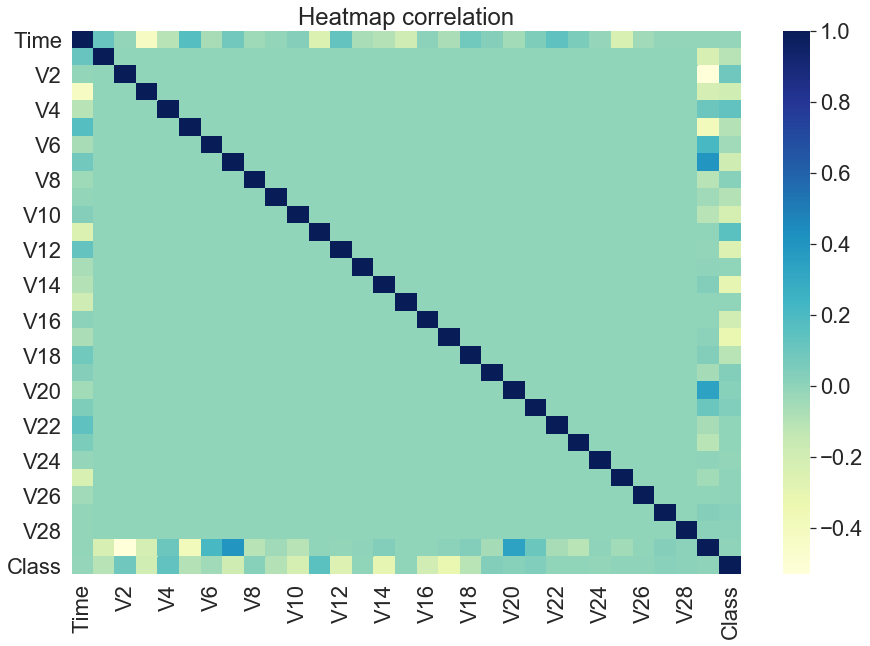

In [115]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap="YlGnBu") # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

In [116]:
rank = df_corr['Class'] #Marrja e koeficientëve të korrelacionit për tipar në lidhje me klasën e tipareve
df_rank = pd.DataFrame(rank) 
df_rank = np.abs(df_rank).sort_values(by='Class',ascending=False)#Renditja e vlerave absolute të koeficientëve në rend zbritës
df_rank.dropna(inplace=True) # I largojme te dhenat qe mungojne(not number)

# Data Selection

In [117]:
# Ne i veçojmë të dhënat në dy grupe: një databazë trajnuese dhe një databazë testuese
# Së pari ne ndërtojmë të dhënat trajnuese
df_train_all = df[0:150000] #E ndajme datasetin origjinal ne dy pjese
df_train_1 = df_train_all[df_train_all['Class'] == 1] #I ndajme te dhenat qe jane mashtruese dhe jo mashtruese
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('Ne kete dataset, ne kemi ' + str(len(df_train_1)) +" mashtrime prandaj duhet të marrim një numër të ngjashëm jo-mashtrimesh")


Ne kete dataset, ne kemi 293 mashtrime prandaj duhet të marrim një numër të ngjashëm jo-mashtrimesh


In [118]:
df_sample=df_train_0.sample(300)
df_train = df_train_1.append(df_sample) # I bashkojme transaksionet mashtruese dhe ato jomashtruese 
df_train = df_train.sample(frac=1) # I perziejme te dhenat e datasetit

In [119]:
X_train = df_train.drop(['Time', 'Class'],axis=1) 
y_train = df_train['Class'] # E krijojme nje label 
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [120]:
#me gjithe datasetin testues per te provuar nese modeli po punon saktesisht
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [121]:
X_train_rank = df_train[df_rank.index[1:11]] # Ne i marrim dhjetë tiparet e para të renditura
X_train_rank = np.asarray(X_train_rank)

In [122]:
#me gjite datasetin testues per te provuar nese modeli po punon saktesisht
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

# Confusion Matrix

In [123]:
class_names=np.array(['0','1']) # Labele binare, Class = 1 (fraud)  Class = 0 (no fraud)

In [124]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Model Selection


In [125]:
classifier = svm.SVC(kernel='linear')  #Vendosëm një klasifikues SVM, Klasifikuesin SVM të paracaktuar (Kernel = Funksioni i Bazës Radiale)

In [126]:
classifier.fit(X_train, y_train) #Pastaj ne trajnojmë modelin tonë, me te dhenat tona trajnuese

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Testing the model

In [127]:
prediction_SVM_all = classifier.predict(X_test_all) #Dhe ne fund, ne i predikojme te dhenat tona testuese.

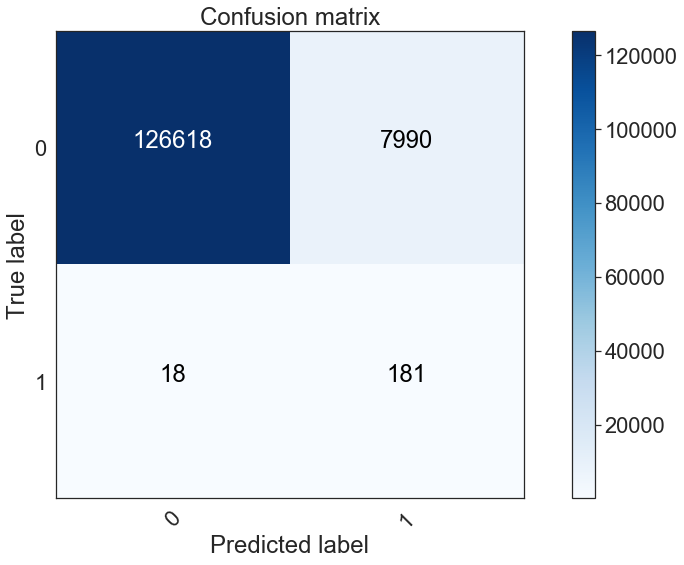

In [128]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In [129]:
print('Kriteri ynë jep një rezultat prej ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Kriteri ynë jep një rezultat prej 0.9157575022665011


In [130]:
print('Ne kemi zbuluar ' + str(cm[1][1]) + ' mashtrime / ' + str(cm[1][1]+cm[1][0]) + ' total i mashtrimeve.')
print('\nKeshtu qe, probabiliteti per te zbuluar nje mashtrim ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("saktesia eshte : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

Ne kemi zbuluar 181 mashtrime / 199 total i mashtrimeve.

Keshtu qe, probabiliteti per te zbuluar nje mashtrim 0.9095477386934674
saktesia eshte : 0.9405965565586357


# Models Rank


In [131]:
classifier.fit(X_train_rank, y_train) # Pastaj ne trajnojmë modelin tonë, me te dhenat të balancuara trajnuese.
prediction_SVM = classifier.predict(X_test_all_rank) #Dhe si perfundim, predikojme te dhenat testuese.

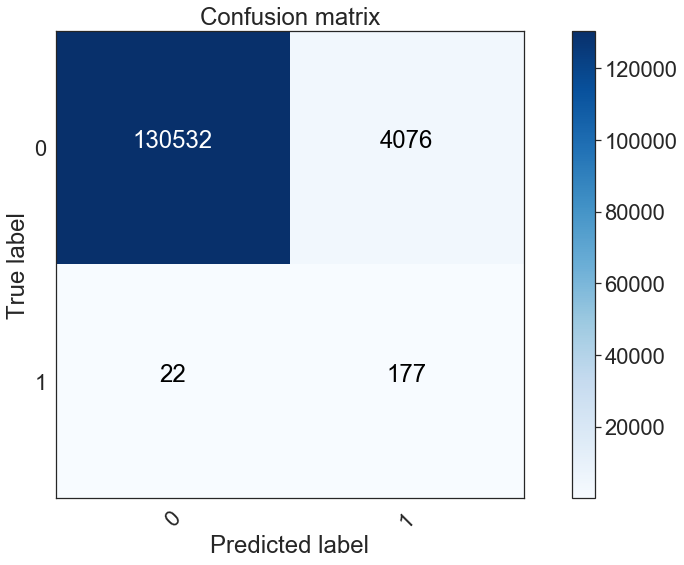

In [132]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [133]:
print('Kriteri yne jep nje rezultat prej ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Kriteri yne jep nje rezultat prej 0.9054779859671335


In [134]:
print('Ne kemi zbuluar ' + str(cm[1][1]) + ' mashtrime / ' + str(cm[1][1]+cm[1][0]) + ' total i mashtrimeve.')
print('\nKeshtu qe, probabiliteti per te detektuar nje mashtrim eshte' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("saktesia eshte : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

Ne kemi zbuluar 177 mashtrime / 199 total i mashtrimeve.

Keshtu qe, probabiliteti per te detektuar nje mashtrim eshte0.8894472361809045
saktesia eshte : 0.9696009851120491


Re-balanced class weigh 


In [135]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [136]:
classifier_b.fit(X_train, y_train) # Pastaj e trajnojme modelin tonde, me te dhenat balancuese trajnuese.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight={0: 0.6, 1: 0.4},
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

# Testing the model

In [137]:
prediction_SVM_b_all = classifier_b.predict(X_test_all) #Predikojme te gjite datasetin

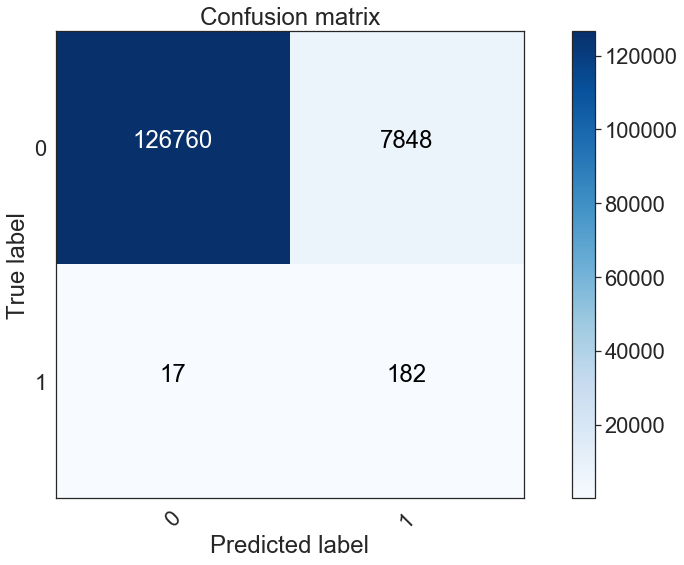

In [138]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [139]:
print('Kriteri yne dha nje rezultat prej ' 
      + str( ( (cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])) + 4 * cm[1][1]/(cm[1][0]+cm[1][1])) / 5))

Kriteri yne dha nje rezultat prej 0.9199897579241613


In [140]:
print('Ne kemi detektuar ' + str(cm[1][1]) + ' mashtrime / ' + str(cm[1][1]+cm[1][0]) + ' total i mashtrimeve.')
print('\nKeshtu qe probabiliteti per ta zbuluar nje mashtrim eshte ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("saktesia eshte : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

Ne kemi detektuar 182 mashtrime / 199 total i mashtrimeve.

Keshtu qe probabiliteti per ta zbuluar nje mashtrim eshte 0.914572864321608
saktesia eshte : 0.9416573323343743
